In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SaaS-Sales1.csv')

In [3]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
df['Year'] = df['Order Date'].str[-4:]

In [5]:
df['Month'] = df['Order Date'].str.split("/").str[0]

In [6]:
df['Unit Price'] = (df['Sales']-df['Profit'])/df['Quantity']

In [7]:
# df['Sales_Profit_Ratio'] = df['Sales'].cumsum() / df['Profit'].cumsum().shift(fill_value=0)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y') 
df = df.sort_values('Order Date', ascending=True)
# df['C_Sales_Profit_Ratio'] =   df.groupby('Customer')['Profit'].cumsum() / df.groupby('Customer')['Sales'].cumsum().shift(fill_value=0)
df['C_1'] =   df.groupby('Customer')['Profit'].cumsum()
df['C_2'] =   df.groupby('Customer')['Sales'].cumsum()
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,License,Sales,Quantity,Discount,Profit,Year,Month,Unit Price,C_1,C_2
7980,7981,APJ-2020-103800,2020-01-04,20200104,Brian Dickens,Japan,Tokyo,APJ,JAPN,Siemens,...,730VUNTJF5,16.448,2,0.2,5.5512,2020,1,5.4484,5.5512,16.448
739,740,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,XGQWR8K66V,11.784,3,0.2,4.2717,2020,1,2.5041,4.2717,11.784
740,741,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,54J2FWJY59,272.736,3,0.2,-64.7748,2020,1,112.5036,-60.5031,284.520
741,742,APJ-2020-112326,2020-01-05,20200105,Liam Churchill,Australia,Wollongong,APJ,ANZ,CVS Health,...,K3HDHHY5YG,3.540,2,0.8,-5.4870,2020,1,4.5135,-65.9901,288.060
1759,1760,EMEA-2020-141817,2020-01-06,20200106,Ella Springer,France,Paris,EMEA,EU-WEST,Mitsubishi,...,PGSY1LZQ71,19.536,3,0.2,4.8840,2020,1,4.8840,4.8840,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,5092,EMEA-2023-156720,2023-12-31,20231231,Max Morgan,Russia,Moscow,EMEA,EU-EAST,Tyson Foods,...,1NXYUPA4CX,3.024,3,0.2,-0.6048,2023,12,1.2096,1690.5775,40326.344
908,909,EMEA-2023-143259,2023-12-31,20231231,Katherine Dowd,United Kingdom,London,EMEA,UKIR,Morgan Stanley,...,IHFJIL4RNB,52.776,3,0.2,19.7910,2023,12,10.9950,-376.6554,28217.384
907,908,EMEA-2023-143259,2023-12-31,20231231,Katherine Dowd,United Kingdom,London,EMEA,UKIR,Morgan Stanley,...,U4EQCPO0OL,90.930,7,0.0,2.7279,2023,12,12.6003,-373.9275,28308.314
1296,1297,AMER-2023-115427,2023-12-31,20231231,Justin Walker,United States,Columbia,AMER,NAMER,Aviva,...,YIM32OGSAB,13.904,2,0.2,4.5188,2023,12,4.6926,1474.3551,14863.527


In [8]:
# Noise check
for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n',sep='\n')

Row ID
[   1    2    3 ... 9992 9993 9994]


Order ID
['AMER-2020-100090' 'AMER-2020-100279' 'AMER-2020-100363' ...
 'EMEA-2023-169929' 'EMEA-2023-169978' 'EMEA-2023-169999']


Order Date
['2020-01-04T00:00:00.000000000' '2020-01-05T00:00:00.000000000'
 '2020-01-06T00:00:00.000000000' ... '2023-12-29T00:00:00.000000000'
 '2023-12-30T00:00:00.000000000' '2023-12-31T00:00:00.000000000']


Date Key
[20200104 20200105 20200106 ... 20231229 20231230 20231231]


Contact Name
['Abigail Langdon' 'Adam Davidson' 'Adam James' 'Adam Manning' 'Adam Nash'
 'Adrian Abraham' 'Adrian Clarkson' 'Adrian Hunter' 'Adrian Poole'
 'Adrian Walker' 'Alan Bailey' 'Alan Berry' 'Alan Gill' 'Alan Graham'
 'Alan Hudson' 'Alan White' 'Alexander Duncan' 'Alexander Hill'
 'Alexander James' 'Alexander Langdon' 'Alexander Martin'
 'Alexander Pullman' 'Alexander Wallace' 'Alexandra Dyer' 'Alexandra May'
 'Alexandra Morrison' 'Alexandra Sharp' 'Alexandra Slater'
 'Alison Coleman' 'Alison Davidson' 'Alison Fisher' 'Alison

C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_8648\1635007738.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<AxesSubplot: >

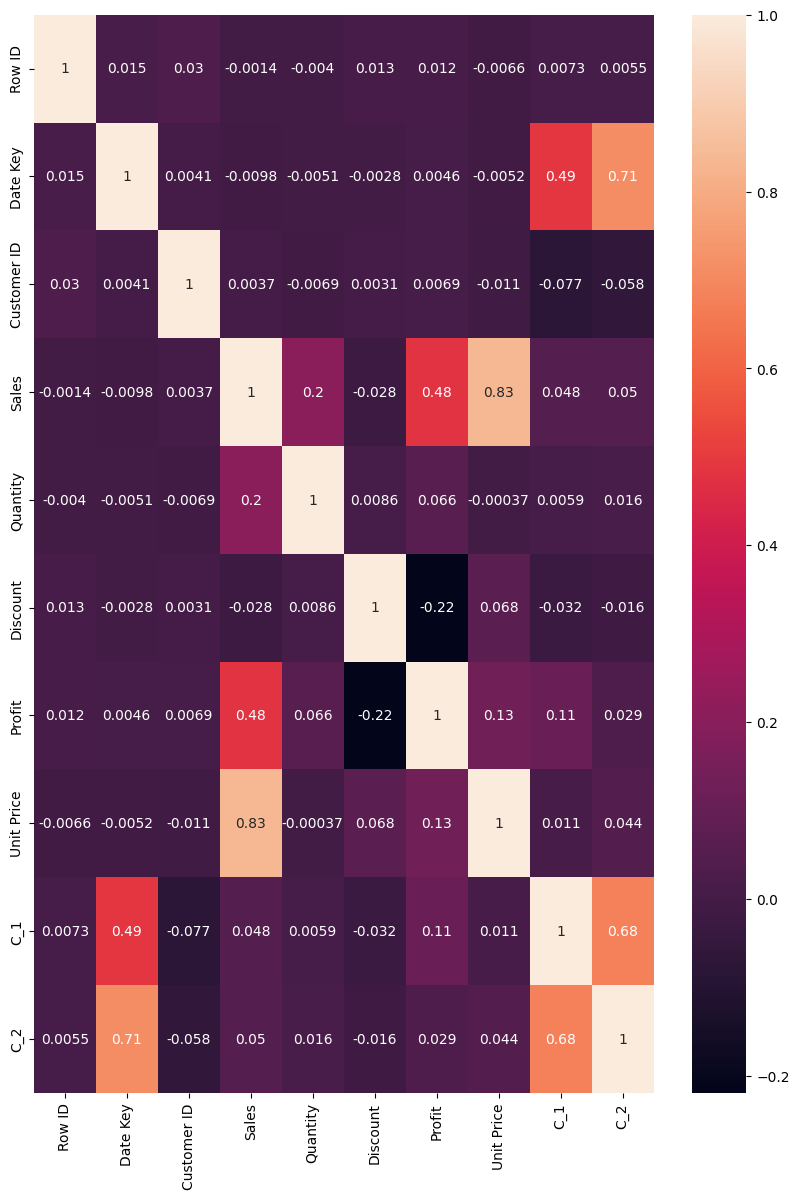

In [9]:
plt.figure(figsize = (10,14))
sns.heatmap(df.corr(),annot = True)

In [10]:
df1=df.drop(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name','City', 'Region','Customer ID','License', 'Sales'],axis = 1)


In [11]:
df1.columns

Index(['Country', 'Subregion', 'Customer', 'Industry', 'Segment', 'Product',
       'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Unit Price', 'C_1',
       'C_2'],
      dtype='object')

In [12]:
# def mean_target_encoding(df, target_col, cat_cols):
#     for col in cat_cols:
#         mean_target = df.groupby(col)[target_col].mean()
#         encoded_col = f'{col}_encoded'
#         df[encoded_col] = df[col].map(mean_target)
#     return df

In [15]:
# target_col = 'Discount'
# cat_cols = ['Subregion', 'Segment','Product','Industry','Year']
# df1 = mean_target_encoding(df1, target_col, cat_cols)

### Outlier Analysis

In [13]:
# classified into categories 
num=[]
cat=[]
for i in df1.columns:
    if df1[i].dtype == 'O':
        cat.append(i)
    else:
        num.append(i)

In [14]:
num.remove('Quantity')
num

['Discount', 'Profit', 'Unit Price', 'C_1', 'C_2']

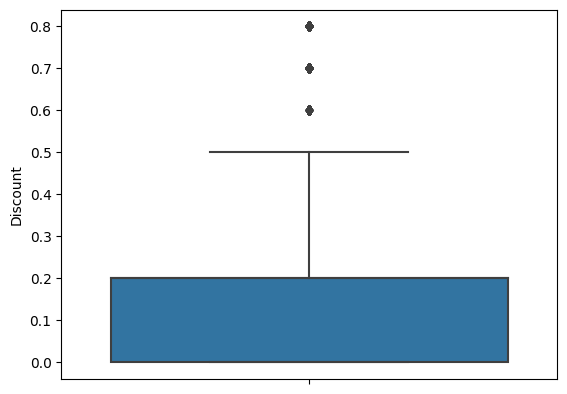

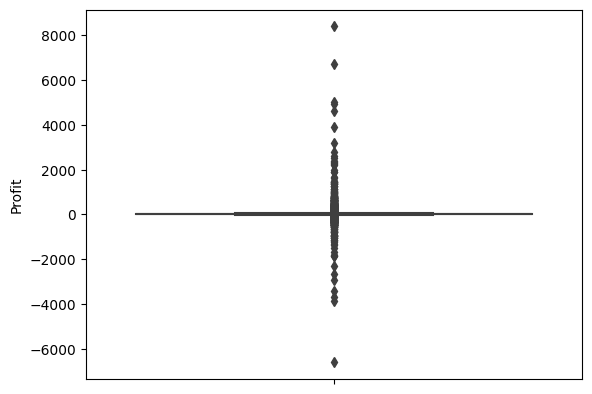

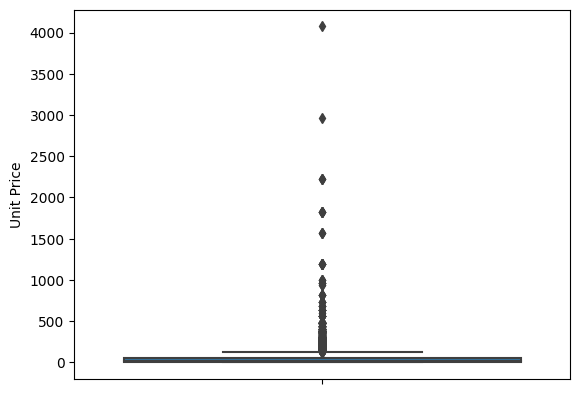

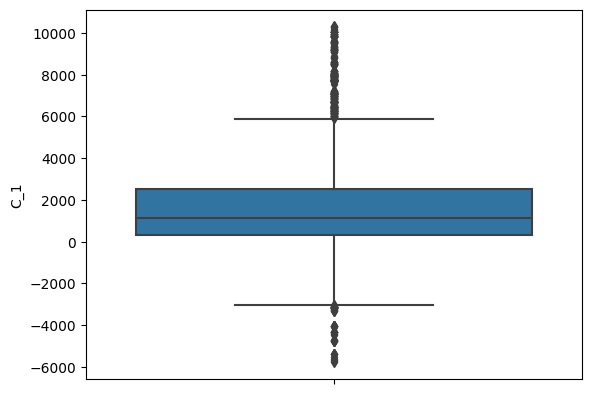

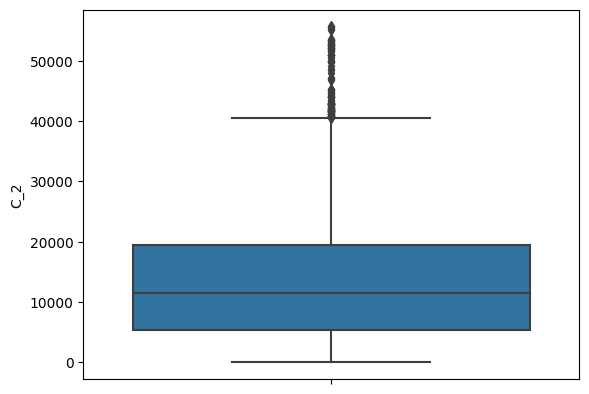

In [15]:
for i in num:
    plt.figure()
    sns.boxplot(y=i,data=df1)

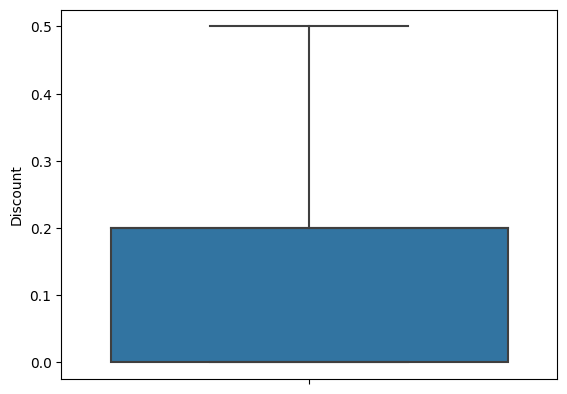

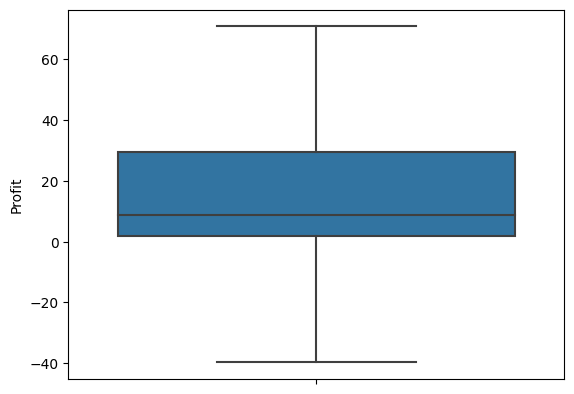

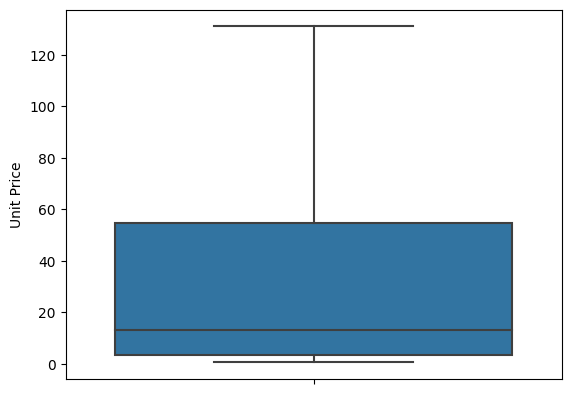

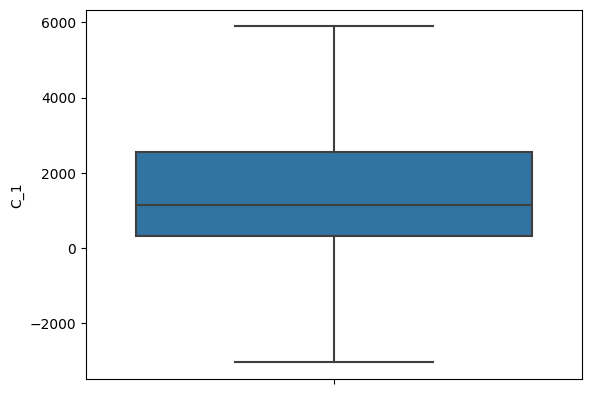

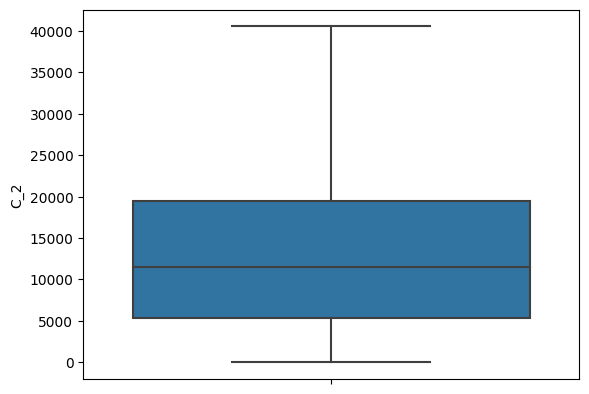

In [16]:
# replaced outlier with lower limit and upper limit
for i in num:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3-q1
    ul = q3+ 1.5*iqr
    ll = q1- 1.5*iqr
    df1[i] = np.where(df1[i] < ll, ll, df1[i])
    df1[i] = np.where(df1[i] > ul, ul, df1[i])
    plt.figure()
    sns.boxplot(y=i, data= df1)

In [17]:
df1

,Country,Subregion,Customer,Industry,Segment,Product,Quantity,Discount,Profit,Year,Month,Unit Price,C_1,C_2
7980,Japan,JAPN,Siemens,Manufacturing,SMB,Support,2,0.2,5.551200,2020,1,5.4484,5.5512,16.448
739,Australia,ANZ,CVS Health,Retail,Enterprise,FinanceHub,3,0.2,4.271700,2020,1,2.5041,4.2717,11.784
740,Australia,ANZ,CVS Health,Retail,Enterprise,Marketing Suite - Gold,3,0.2,-39.724125,2020,1,112.5036,-60.5031,284.520
741,Australia,ANZ,CVS Health,Retail,Enterprise,ContactMatcher,2,0.5,-5.487000,2020,1,4.5135,-65.9901,288.060
1759,France,EU-WEST,Mitsubishi,Manufacturing,SMB,ChatBot Plugin,3,0.2,4.884000,2020,1,4.8840,4.8840,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,Russia,EU-EAST,Tyson Foods,Consumer Products,SMB,Storage,3,0.2,-0.604800,2023,12,1.2096,1690.5775,40326.344
908,United Kingdom,UKIR,Morgan Stanley,Finance,SMB,ContactMatcher,3,0.2,19.791000,2023,12,10.9950,-376.6554,28217.384
907,United Kingdom,UKIR,Morgan Stanley,Finance,SMB,Site Analytics,7,0.0,2.727900,2023,12,12.6003,-373.9275,28308.314
1296,United States,NAMER,Aviva,Finance,Strategic,ContactMatcher,2,0.2,4.518800,2023,12,4.6926,1474.3551,14863.527


In [18]:
df2 = pd.get_dummies(df1, columns = ['Country','Subregion','Customer','Industry','Segment','Product'], drop_first = True)
df2

,Quantity,Discount,Profit,Year,Month,Unit Price,C_1,C_2,Country_Australia,Country_Austria,...,Product_Data Smasher,Product_FinanceHub,Product_Marketing Suite,Product_Marketing Suite - Gold,Product_OneView,Product_SaaS Connector Pack,Product_SaaS Connector Pack - Gold,Product_Site Analytics,Product_Storage,Product_Support
7980,2,0.2,5.551200,2020,1,5.4484,5.5512,16.448,0,0,...,0,0,0,0,0,0,0,0,0,1
739,3,0.2,4.271700,2020,1,2.5041,4.2717,11.784,1,0,...,0,1,0,0,0,0,0,0,0,0
740,3,0.2,-39.724125,2020,1,112.5036,-60.5031,284.520,1,0,...,0,0,0,1,0,0,0,0,0,0
741,2,0.5,-5.487000,2020,1,4.5135,-65.9901,288.060,1,0,...,0,0,0,0,0,0,0,0,0,0
1759,3,0.2,4.884000,2020,1,4.8840,4.8840,19.536,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,3,0.2,-0.604800,2023,12,1.2096,1690.5775,40326.344,0,0,...,0,0,0,0,0,0,0,0,1,0
908,3,0.2,19.791000,2023,12,10.9950,-376.6554,28217.384,0,0,...,0,0,0,0,0,0,0,0,0,0
907,7,0.0,2.727900,2023,12,12.6003,-373.9275,28308.314,0,0,...,0,0,0,0,0,0,0,1,0,0
1296,2,0.2,4.518800,2023,12,4.6926,1474.3551,14863.527,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [22]:
# num.remove('Discount')
df2[num]=sc.fit_transform(df2[num])
num

['Profit', 'Unit Price', 'C_1', 'C_2']

In [23]:
df2

,Quantity,Discount,Profit,Year,Month,Unit Price,C_1,C_2,Country_Australia,Country_Austria,...,Product_Data Smasher,Product_FinanceHub,Product_Marketing Suite,Product_Marketing Suite - Gold,Product_OneView,Product_SaaS Connector Pack,Product_SaaS Connector Pack - Gold,Product_Site Analytics,Product_Storage,Product_Support
7980,2,0.2,-0.356683,2020,1,-0.691730,-0.887464,-1.350249,0,0,...,0,0,0,0,0,0,0,0,0,1
739,3,0.2,-0.400078,2020,1,-0.756950,-0.888186,-1.350725,1,0,...,0,1,0,0,0,0,0,0,0,0
740,3,0.2,-1.892220,2020,1,1.679701,-0.924762,-1.322913,1,0,...,0,0,0,1,0,0,0,0,0,0
741,2,0.5,-0.731050,2020,1,-0.712439,-0.927861,-1.322552,1,0,...,0,0,0,0,0,0,0,0,0,0
1759,3,0.2,-0.379312,2020,1,-0.704232,-0.887841,-1.349934,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,3,0.2,-0.565467,2023,12,-0.785626,0.064012,2.760266,0,0,...,0,0,0,0,0,0,0,0,1,0
908,3,0.2,0.126267,2023,12,-0.568864,-1.103283,1.525481,0,0,...,0,0,0,0,0,0,0,0,0,0
907,7,0.0,-0.452437,2023,12,-0.533305,-1.101742,1.534754,0,0,...,0,0,0,0,0,0,0,1,0,0
1296,2,0.2,-0.391698,2023,12,-0.708472,-0.058081,0.163750,0,0,...,0,0,0,0,0,0,0,0,0,0


### LinearRegression 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
x= df2.drop('Discount',axis=1)
y=df2['Discount']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred= lr.predict(x_test)
y_pred

array([ 0.45640945,  0.06232023,  0.2100687 , ...,  0.23054743,
       -0.02865362,  0.31087828])

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model, metrics
r2_score = metrics.r2_score(y_test, y_pred) 
r2_score

0.8285173019231045

In [30]:
# MSE
mean_squared_error(y_test, y_pred)

0.004247301070491218

In [31]:
# Coefficients
lr.coef_

array([ 2.81563740e-03, -3.09805144e-02,  1.81488911e-03,  4.78730535e-05,
        1.33180556e-02,  5.51808690e-04, -3.60822410e-03,  4.18302484e+09,
        1.14402908e+09,  1.14402908e+09, -1.25644593e-03, -1.78953103e+10,
        2.28375726e-01, -2.02869610e+09, -7.54502548e-03, -4.83908509e-03,
        1.14402908e+09,  3.13012476e+08,  1.14402908e+09,  7.42175257e+08,
        1.69836987e+09,  1.14402908e+09,  1.14402908e+09,  3.13012476e+08,
        1.14402908e+09,  2.21332147e+08, -2.02869610e+09,  8.24281594e+09,
        3.13012476e+08,  1.29057168e+10,  3.66917152e+10,  1.14402908e+09,
        2.49106302e-01,  1.14402908e+09,  4.18302484e+09,  1.69836987e+09,
       -2.02869610e+09,  1.14402908e+09,  1.14402908e+09,  7.42175257e+08,
        3.13012476e+08,  7.42175257e+08, -2.02869610e+09,  1.14402908e+09,
        7.42175257e+08, -2.02869610e+09,  1.14402908e+09,  1.69836987e+09,
       -2.02869610e+09,  7.42175257e+08,  3.13012476e+08,  7.42175257e+08,
        8.24281594e+09, -

In [32]:
# Adjusted R2 score
Adj_r2 = 1 - ((1 - r2_score) * (len(y_test) - 1)) / (len(y_test) - 10 - 1)
Adj_r2

0.8276547128985727

In [ ]:
# sns.pairplot(data=df1, diag_kind= "kde" )

In [34]:
df2.head()

,Quantity,Discount,Profit,Year,Month,Unit Price,C_1,C_2,Country_Australia,Country_Austria,...,Product_Data Smasher,Product_FinanceHub,Product_Marketing Suite,Product_Marketing Suite - Gold,Product_OneView,Product_SaaS Connector Pack,Product_SaaS Connector Pack - Gold,Product_Site Analytics,Product_Storage,Product_Support
7980,2,0.2,-0.356683,2020,1,-0.691730,-0.887464,-1.350249,0,0,...,0,0,0,0,0,0,0,0,0,1
739,3,0.2,-0.400078,2020,1,-0.756950,-0.888186,-1.350725,1,0,...,0,1,0,0,0,0,0,0,0,0
740,3,0.2,-1.892220,2020,1,1.679701,-0.924762,-1.322913,1,0,...,0,0,0,1,0,0,0,0,0,0
741,2,0.5,-0.731050,2020,1,-0.712439,-0.927861,-1.322552,1,0,...,0,0,0,0,0,0,0,0,0,0
1759,3,0.2,-0.379312,2020,1,-0.704232,-0.887841,-1.349934,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df2.columns

Index(['Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Unit Price', 'C_1',
       'C_2', 'Country_Australia', 'Country_Austria',
       ...
       'Product_Data Smasher', 'Product_FinanceHub', 'Product_Marketing Suite',
       'Product_Marketing Suite - Gold', 'Product_OneView',
       'Product_SaaS Connector Pack', 'Product_SaaS Connector Pack - Gold',
       'Product_Site Analytics', 'Product_Storage', 'Product_Support'],
      dtype='object', length=188)

<AxesSubplot: xlabel='Discount'>

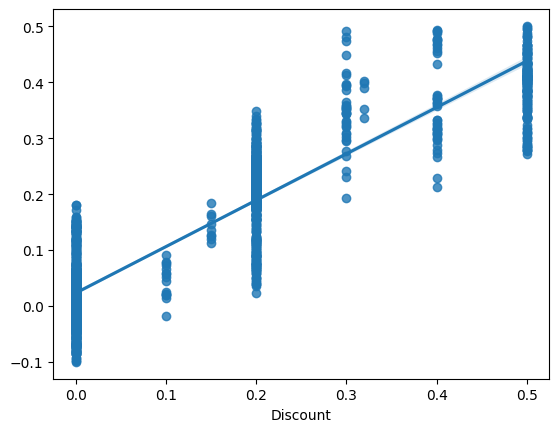

In [36]:
sns.regplot(x=y_test,y=y_pred)

# End Line ---------------